In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('data/totalData.csv')
df

C:\Users\annab\AppData\Local\Temp\ipykernel_3296\404394617.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/totalData.csv')


,Unnamed: 0,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,ListingKey,ListAgentEmail,...,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict
0,0,MLSListings,MLSListings,"Laminate,Tile",False,NaN,NaN,NaN,1077427852,bholmes@compass.com,...,NaN,7500.0,NaN,False,1.0,Other,94025,NaN,7500.0,NaN
1,1,SouthBay,SouthBay,NaN,True,NaN,NaN,True,1077370123,TeamLyon@LyonStahl.com,...,NaN,7051.0,4.0,True,2.0,Hermosa,90254,0.0,7051.0,NaN
2,2,MLSListings,MLSListings,NaN,False,NaN,NaN,NaN,1077294226,mbarrera0615@gmail.com,...,NaN,7600.0,NaN,False,1.0,Other,93906,NaN,7600.0,NaN
3,3,OutofAreaBoard,OutofAreaBoard,Wood,False,NaN,NaN,False,1077271803,EdanAmar@yahoo.com,...,50x124,6205.0,NaN,False,NaN,NaN,90046,NaN,6205.0,NaN
4,4,SanDiego,SanDiego,NaN,False,NaN,NaN,False,1077148727,doug@dougwestgroup.com,...,NaN,6378.0,NaN,False,3.0,NaN,92057,150.0,6378.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,91067,OrangeCounty,OrangeCounty,Vinyl,True,NaN,NaN,False,1038551758,patrick@patrickhourigan.com,...,NaN,3000.0,0.0,False,2.0,Capistrano Unified,92651,0.0,3000.0,NaN
91068,91068,RimOTheWorld,RimOTheWorld,"Carpet,Wood",True,NaN,NaN,False,1038339234,vickycenter@gmail.com,...,NaN,16653.0,1.0,False,2.0,Rim of the World,92352,240.0,16653.0,NaN
91069,91069,Downey,Downey,NaN,True,NaN,NaN,False,1033918791,CarlosCahuas@outlook.com,...,NaN,108900.0,4.0,False,2.0,Barstow Unified,92365,0.0,108900.0,NaN
91070,91070,Mlslistings,Mlslistings,NaN,False,NaN,NaN,NaN,1023270484,assistant@danmoskowitz.com,...,NaN,6336.0,NaN,False,2.0,Other,95121,NaN,6336.0,NaN


In [120]:
# using the features that claire picked out, including Fireplace YN though (see soon)

features = ['PoolPrivateYN', 'ViewYN', 'DaysOnMarket', 'TaxAnnualAmount', 'BedroomsTotal', 'ClosePrice', 'FireplaceYN', 
'BathroomsTotalInteger', 'YearBuilt', 'BasementYN', 'LivingArea', 'PropertyType', 'PostalCode', 'AttachedGarageYN', 'Flooring']
drop_columns = df.columns.difference(features)

In [121]:
# check to ensure what columns i'm dropping

drop_columns

Index(['AboveGradeFinishedArea', 'AssociationFee', 'AssociationFeeFrequency',
       'BelowGradeFinishedArea', 'BuilderName', 'BuildingAreaTotal',
       'BusinessType', 'BuyerAgentAOR', 'BuyerAgentFirstName',
       'BuyerAgentLastName', 'BuyerAgentMlsId', 'BuyerOfficeAOR',
       'BuyerOfficeName', 'City', 'CloseDate', 'CoBuyerAgentFirstName',
       'CoListAgentFirstName', 'CoListAgentLastName', 'CoListOfficeName',
       'ContractStatusChangeDate', 'CountyOrParish', 'CoveredSpaces',
       'ElementarySchool', 'ElementarySchoolDistrict', 'FireplacesTotal',
       'GarageSpaces', 'HighSchool', 'HighSchoolDistrict', 'Latitude',
       'Levels', 'ListAgentAOR', 'ListAgentEmail', 'ListAgentFirstName',
       'ListAgentFullName', 'ListAgentLastName', 'ListOfficeName',
       'ListingContractDate', 'ListingId', 'ListingKey', 'ListingKeyNumeric',
       'Longitude', 'LotSizeAcres', 'LotSizeArea', 'LotSizeDimensions',
       'LotSizeSquareFeet', 'MLSAreaMajor', 'MainLevelBedrooms',
       '

In [122]:
df = df.drop(columns = drop_columns)
df

,Flooring,ViewYN,BasementYN,PoolPrivateYN,ClosePrice,LivingArea,DaysOnMarket,TaxAnnualAmount,AttachedGarageYN,YearBuilt,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,PostalCode
0,"Laminate,Tile",False,NaN,NaN,3000000.0,1831.0,0,NaN,False,1948.0,2.0,3.0,True,94025
1,NaN,True,NaN,True,7750000.0,5000.0,0,NaN,True,2024.0,5.0,5.0,True,90254
2,NaN,False,NaN,NaN,575000.0,863.0,0,NaN,True,1950.0,1.0,2.0,True,93906
3,Wood,False,NaN,False,1810000.0,1338.0,0,NaN,NaN,1923.0,1.0,3.0,True,90046
4,NaN,False,NaN,False,1135000.0,3203.0,0,NaN,True,2009.0,4.0,4.0,False,92057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,Vinyl,True,NaN,False,4000000.0,2822.0,248,NaN,True,1977.0,3.0,4.0,True,92651
91068,"Carpet,Wood",True,NaN,False,4600000.0,5846.0,546,NaN,True,1985.0,7.0,6.0,True,92352
91069,NaN,True,NaN,False,170000.0,1909.0,480,NaN,True,1984.0,2.0,3.0,False,92365
91070,NaN,False,NaN,NaN,1071000.0,1720.0,23,NaN,True,1965.0,2.0,3.0,False,95121


In [123]:
# only 57 missing values for whether or not there is a fireplace

df.isnull().sum()

Flooring                 32045
ViewYN                    8226
BasementYN               88812
PoolPrivateYN            10858
ClosePrice                   2
LivingArea                  49
DaysOnMarket                 0
TaxAnnualAmount          91072
AttachedGarageYN         10136
YearBuilt                   72
BathroomsTotalInteger       17
BedroomsTotal                0
FireplaceYN                 57
PostalCode                   0
dtype: int64

In [124]:
YN_cols = ['ViewYN', 'BasementYN','PoolPrivateYN', 'AttachedGarageYN']
YN_info = []
total_num = df.shape[0]
for col in YN_cols:
    percent_na = df[col].isna().sum()/total_num
    percent_true = df[col].sum()/total_num
    percent_false = (total_num - df[col].sum() - df[col].isna().sum())/total_num
    YN_info.append((col,round(percent_na,4),round(percent_true,4),round(percent_false,4)))

In [125]:
YN_info

[('ViewYN', 0.0903, 0.5327, 0.3769),
 ('BasementYN', 0.9752, 0.0248, 0.0),
 ('PoolPrivateYN', 0.1192, 0.1386, 0.7422),
 ('AttachedGarageYN', 0.1113, 0.7368, 0.1519)]

In [126]:
df['AdditionalAttractionYN'] = df[['BasementYN', 'AttachedGarageYN', 'ViewYN', 'PoolPrivateYN']].any(axis = 1)

In [127]:
df = df.drop(columns = ['BasementYN', 'AttachedGarageYN', 'ViewYN', 'PoolPrivateYN'])

In [128]:
df

,Flooring,ClosePrice,LivingArea,DaysOnMarket,TaxAnnualAmount,YearBuilt,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,PostalCode,AdditionalAttractionYN
0,"Laminate,Tile",3000000.0,1831.0,0,NaN,1948.0,2.0,3.0,True,94025,False
1,NaN,7750000.0,5000.0,0,NaN,2024.0,5.0,5.0,True,90254,True
2,NaN,575000.0,863.0,0,NaN,1950.0,1.0,2.0,True,93906,True
3,Wood,1810000.0,1338.0,0,NaN,1923.0,1.0,3.0,True,90046,False
4,NaN,1135000.0,3203.0,0,NaN,2009.0,4.0,4.0,False,92057,True
...,...,...,...,...,...,...,...,...,...,...,...
91067,Vinyl,4000000.0,2822.0,248,NaN,1977.0,3.0,4.0,True,92651,True
91068,"Carpet,Wood",4600000.0,5846.0,546,NaN,1985.0,7.0,6.0,True,92352,True
91069,NaN,170000.0,1909.0,480,NaN,1984.0,2.0,3.0,False,92365,True
91070,NaN,1071000.0,1720.0,23,NaN,1965.0,2.0,3.0,False,95121,True


In [129]:
# tax and flooring are looking like issues...

df.isnull().sum()

Flooring                  32045
ClosePrice                    2
LivingArea                   49
DaysOnMarket                  0
TaxAnnualAmount           91072
YearBuilt                    72
BathroomsTotalInteger        17
BedroomsTotal                 0
FireplaceYN                  57
PostalCode                    0
AdditionalAttractionYN        0
dtype: int64

In [130]:
# gonna drop tax for now

df = df.drop(columns = ['TaxAnnualAmount'])
df

,Flooring,ClosePrice,LivingArea,DaysOnMarket,YearBuilt,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,PostalCode,AdditionalAttractionYN
0,"Laminate,Tile",3000000.0,1831.0,0,1948.0,2.0,3.0,True,94025,False
1,NaN,7750000.0,5000.0,0,2024.0,5.0,5.0,True,90254,True
2,NaN,575000.0,863.0,0,1950.0,1.0,2.0,True,93906,True
3,Wood,1810000.0,1338.0,0,1923.0,1.0,3.0,True,90046,False
4,NaN,1135000.0,3203.0,0,2009.0,4.0,4.0,False,92057,True
...,...,...,...,...,...,...,...,...,...,...
91067,Vinyl,4000000.0,2822.0,248,1977.0,3.0,4.0,True,92651,True
91068,"Carpet,Wood",4600000.0,5846.0,546,1985.0,7.0,6.0,True,92352,True
91069,NaN,170000.0,1909.0,480,1984.0,2.0,3.0,False,92365,True
91070,NaN,1071000.0,1720.0,23,1965.0,2.0,3.0,False,95121,True


In [131]:
# finding the age of each house instead of going off of the built year
from datetime import datetime

df['YearBuilt'] = df['YearBuilt'].astype('Int64')
current_year = datetime.now().year
df['Age'] = current_year - df['YearBuilt']
df = df.drop(columns='YearBuilt')

In [132]:
df

,Flooring,ClosePrice,LivingArea,DaysOnMarket,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,PostalCode,AdditionalAttractionYN,Age
0,"Laminate,Tile",3000000.0,1831.0,0,2.0,3.0,True,94025,False,77
1,NaN,7750000.0,5000.0,0,5.0,5.0,True,90254,True,1
2,NaN,575000.0,863.0,0,1.0,2.0,True,93906,True,75
3,Wood,1810000.0,1338.0,0,1.0,3.0,True,90046,False,102
4,NaN,1135000.0,3203.0,0,4.0,4.0,False,92057,True,16
...,...,...,...,...,...,...,...,...,...,...
91067,Vinyl,4000000.0,2822.0,248,3.0,4.0,True,92651,True,48
91068,"Carpet,Wood",4600000.0,5846.0,546,7.0,6.0,True,92352,True,40
91069,NaN,170000.0,1909.0,480,2.0,3.0,False,92365,True,41
91070,NaN,1071000.0,1720.0,23,2.0,3.0,False,95121,True,60


In [133]:
# decided to steal brandon's data cleaning methods

# fill numeric columns with median
num_cols = ["BedroomsTotal", "BathroomsTotalInteger", "Age", "LivingArea"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# fill NaNs with "N" before conversion
df['FireplaceYN'] = df['FireplaceYN'].fillna("N")
# convert "Y" into 1, "N" into 0, and change type to integer
df['FireplaceYN'] = df['FireplaceYN'].replace({"Y": 1, "N": 0}).astype(int)

# fill categorical variables with "Unknown"
cat_cols = ["Flooring", "PostalCode"]
df[cat_cols] = df[cat_cols].fillna("Unknown")

df["PostalCode"] = df["PostalCode"].astype("category").cat.codes
df["Flooring"] = df["Flooring"].astype("category").cat.codes

In [134]:
# using standard scaler
from sklearn.preprocessing import StandardScaler

df_close = (df['ClosePrice']).to_frame()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_close)

df['ClosePrice'] = scaled_data

In [135]:
# we can see the scaling on the close price
df

,Flooring,ClosePrice,LivingArea,DaysOnMarket,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,PostalCode,AdditionalAttractionYN,Age
0,210,0.850453,1831.0,0,2.0,3.0,1,862,False,77
1,243,3.184945,5000.0,0,5.0,5.0,1,84,True,1
2,243,-0.341367,863.0,0,1.0,2.0,1,833,True,75
3,246,0.265601,1338.0,0,1.0,3.0,1,48,False,102
4,243,-0.066142,3203.0,0,4.0,4.0,0,349,True,16
...,...,...,...,...,...,...,...,...,...,...
91067,244,1.341925,2822.0,248,3.0,4.0,1,566,True,48
91068,158,1.636808,5846.0,546,7.0,6.0,1,474,True,40
91069,243,-0.540413,1909.0,480,2.0,3.0,0,480,True,41
91070,243,-0.097597,1720.0,23,2.0,3.0,0,1512,True,60


In [136]:
df = df.dropna(how = 'any')
df.isnull().sum()

Flooring                  0
ClosePrice                0
LivingArea                0
DaysOnMarket              0
BathroomsTotalInteger     0
BedroomsTotal             0
FireplaceYN               0
PostalCode                0
AdditionalAttractionYN    0
Age                       0
dtype: int64

In [137]:
X = df.drop(columns=["ClosePrice"])
Y = df["ClosePrice"]

In [138]:
# just checking the shape to ensure it works
print(X.shape)
print(Y.shape)

(91070, 9)
(91070,)


In [139]:
import sklearn

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [141]:
# checking data dimensions

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((72856, 9), (72856,), (18214, 9), (18214,))

In [142]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

In [143]:
model.fit(X_train, Y_train)

LinearRegression()

In [144]:
Y_pred = model.predict(X_test)

In [145]:
# for some reason i kept getting an error that my inputs had nulls (when I ran the check for coefficients, intercepts, MSE below)
# so i decided to convert all the nans to zero... thats probably fine right

Y_pred = np.nan_to_num(Y_pred, nan=0)
Y_test = np.nan_to_num(Y_test, nan=0)

In [146]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):', mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2):', r2_score(Y_test, Y_pred))

Coefficients: [ 7.56099599e-04  2.93746756e-04 -1.32853378e-04  1.33382107e-01
 -4.51708172e-02  5.95347973e-02  6.32510479e-05 -1.08621962e-02
  5.17021802e-03]
Intercept: -1.2672570528451887
Mean squared error (MSE): 1.1452501309548087
Coefficient of determination (R^2): 0.14928105306671724


In [ ]:
# these features in order correspond to these coefficients: 
# Coefficients: [ 7.56099599e-04  2.93746756e-04 -1.32853378e-04  1.33382107e-01
# -4.51708172e-02  5.95347973e-02  6.32510479e-05 -1.08621962e-02
#  5.17021802e-03]
print(X.columns)

Index(['Flooring', 'LivingArea', 'DaysOnMarket', 'BathroomsTotalInteger',
       'BedroomsTotal', 'FireplaceYN', 'PostalCode', 'AdditionalAttractionYN',
       'Age'],
      dtype='object')


<Axes: >

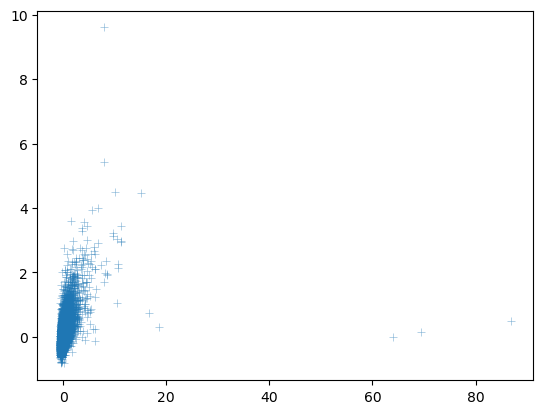

In [148]:
# comparing actual data w test data

sns.scatterplot(x=Y_test, y=Y_pred, marker = '+', alpha = 0.5)